In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\ML.csv")
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(448), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [7]:
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [15]:
df.dtypes

hsi_id            object
0                float64
1                float64
2                float64
3                float64
                  ...   
444              float64
445              float64
446              float64
447              float64
vomitoxin_ppb      int64
Length: 450, dtype: object

In [18]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [20]:
df.shape

(500, 450)

In [25]:
# using iloc for exclidung first column
df1 = df.iloc[:,1:]

In [26]:
# filling missing value if have.
df1.fillna(df1.mean(),inplace = True)

In [27]:
# outlier detection
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

In [28]:
IQR = Q3 - Q1

In [29]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
outlier = ((df1 < lower_bound) | (df1 > upper_bound).sum())
print("outlier detected per column")
outlier

outlier detected per column


,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
496,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
497,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
498,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


# lets clean outliers

In [77]:
cleaned_outlier = df1[~((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)]
cleaned_outlier

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0


<Axes: >

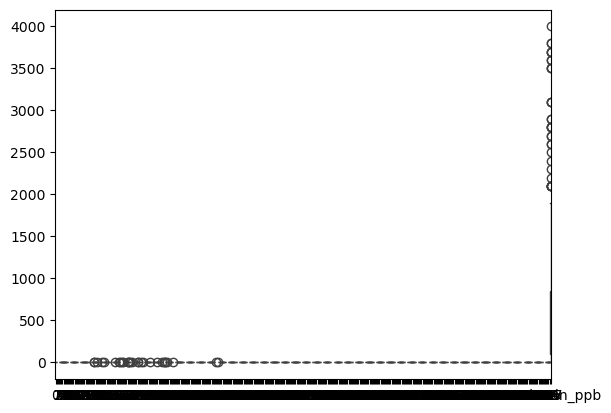

In [78]:
sns.boxplot(data=cleaned_outlier)

In [38]:
total_row = df1.shape[0]
total_row

500

In [39]:
remaining_row = cleaned_outlier.shape[0]
remaining_row

388

In [41]:
print(f"total row before outlier removal :{total_row}")
print(f"remaining row after outier removel: {remaining_row}")
print(f"percentage of data left {remaining_row / total_row * 100:.2f}%")

total row before outlier removal :500
remaining row after outier removel: 388
percentage of data left 77.60%


# feature target

In [43]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [44]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# pca for dim reduction

In [45]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

Text(0.5, 1.0, 'PCA Visualization of Spectral Data')

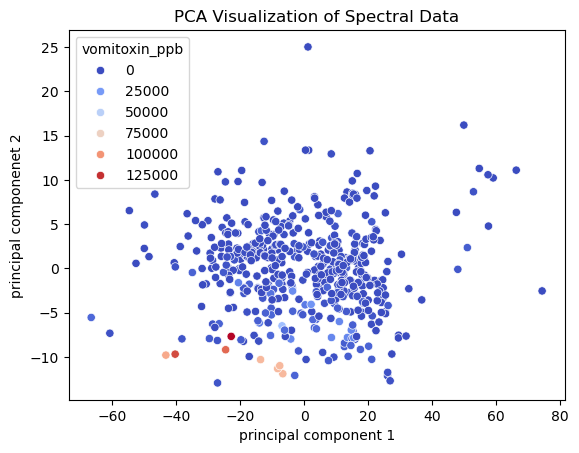

In [50]:
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = y , palette = "coolwarm")
plt.xlabel("principal component 1")
plt.ylabel("principal componenet 2")
plt.title("PCA Visualization of Spectral Data")


# splitting data

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.2,random_state=42)

In [56]:
# model training
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [57]:
# prediction
y_pred = model.predict(x_test)
y_pred

array([ 1260.1 ,  2373.92,  1372.04,   917.32,  1980.8 ,   751.26,
        1266.26,  3217.66,   946.  ,   733.68,   683.  ,   697.02,
        2035.  ,  1159.  ,  1128.6 ,  2826.62,   848.4 ,   702.  ,
        1543.72,   985.  ,   944.82,  3230.  ,  2129.  ,  6189.  ,
         540.5 ,  4850.  ,   860.98,  1259.98,  1169.98,  1499.48,
        3577.  ,   848.7 ,   854.02,  1546.26, 31728.  , 20266.  ,
         730.5 ,  1127.  ,  1193.9 ,   866.4 ,   577.5 ,  1400.06,
         971.7 ,   662.9 ,   766.7 ,   598.7 ,  1717.  ,  3702.  ,
        2614.  ,  7335.5 ,  1827.5 ,  1323.66,  8403.8 , 39178.  ,
        1636.1 ,   576.5 ,  1146.  ,  4203.2 ,   747.38,   918.  ,
         782.24,   746.74, 33295.  ,  4785.8 ,   893.68,   649.54,
        5422.1 ,  1017.98,  1016.36,   597.5 , 15725.  ,  4996.5 ,
       33981.  ,   721.  ,  3053.76,  1346.08,  1292.3 ,   993.5 ,
        4014.12,  2029.92,  2642.2 ,   961.7 ,  4775.  ,  1423.56,
        1277.38,  1106.5 ,   565.4 ,   881.1 , 21213.  , 24650

In [67]:
# model evaluation
mean_absolute_error(y_test,y_pred)

4060.0688

In [81]:
np.sqrt(mean_squared_error(y_test,y_pred))

11533.894996470273

In [69]:
r2_score(y_test,y_pred)

0.24502462384002655

Text(0.5, 1.0, 'Actual vs Predicted DON Concentration')

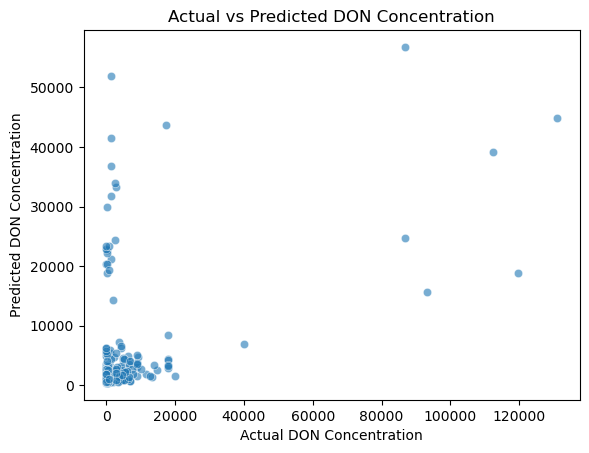

In [75]:
sns.scatterplot(x=y_test,y = y_pred,alpha=0.6)
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs Predicted DON Concentration")